<a href="https://colab.research.google.com/github/BetoNMO/Data-Science/blob/master/2_ManejandoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejando datos

En este ejercicio cargaremos, analizaremos y modificaremos un conjunto de datos sencillo

## Importando librerias

Primero importaremos las librerias que nos servirán a lo largo del ejercicio

In [0]:
import sklearn.datasets
import sklearn.preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Cargando y visualizando los datos

Utilizaremos un conjunto de datos disponible de sklearn

In [0]:
data = sklearn.datasets.load_iris()
type(data)

sklearn.utils.Bunch

Vemos que `data` es de tipo `Bunch`. Esta estructura es similar a los diccionarios:

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
data['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [0]:
data['data'].shape

(150, 4)

## Separar categorias (labels) y muestras (samples)

Comunmente se separan estos datos en dos variables diferentes

In [0]:
x = data['data'] # samples
y = data['target'] # labels

De este modo podemos trabajar con las muestras independientemente y al mismo tiempo seguir guardando la categoría de cada muestra:

`x[i]` tiene categoría `y[i]`

In [0]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


## Analizando los datos

Es conveniente siempre analizar los datos antes de intentar solucionar el problema. Empezaremos convirtiendo nuestro conjunto de datos en un `DataFrame` de `pandas`

In [0]:
df = pd.DataFrame(x, columns=data.feature_names)

Y ahora vamos a plottear las muestras:

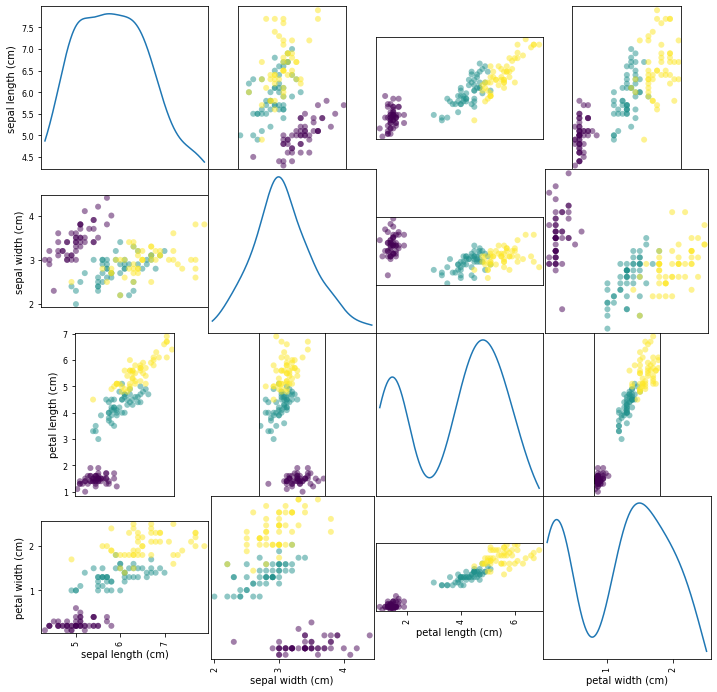

In [0]:
axss = pd.plotting.scatter_matrix(df, c=y, figsize=(12, 12), marker='o',
                                  diagonal='kde')
for i in range(len(axss)):
  for j in range(len(axss[i])):
    if i != j:
      axss[i,j].set_aspect('equal')

## Preprocesando datos

Es claro que los resultados tienen escalas desproporcionadas, probaremos varias técnicas para modificar las escalas. Para más técnicas ver: [lista completa](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

### Normalizar

Ahora normalizaremos los datos

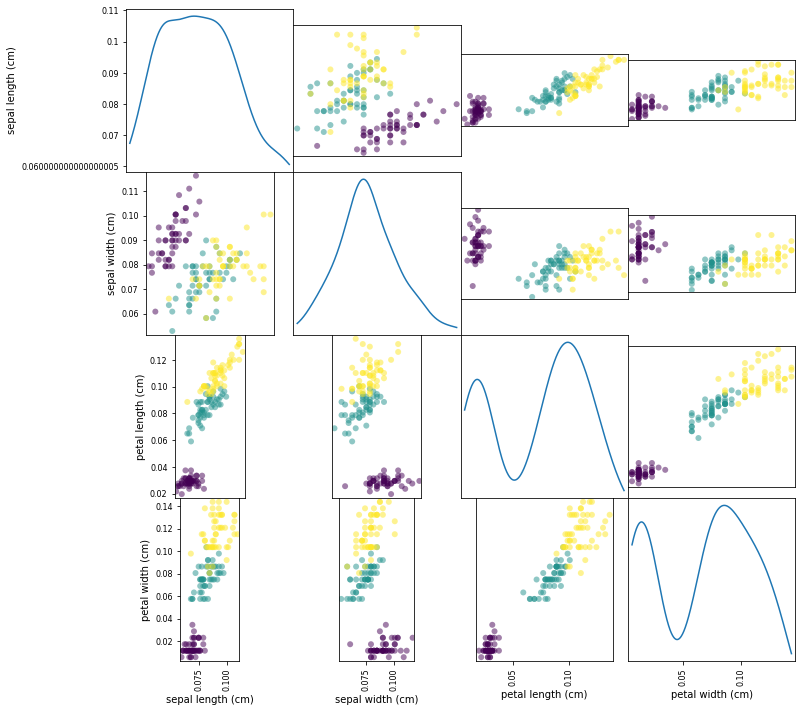

In [0]:
x1 = sklearn.preprocessing.normalize(x, axis=0)
df1 = pd.DataFrame(x1, columns=data.feature_names)
axss = pd.plotting.scatter_matrix(df1, c=y, figsize=(12, 12), marker='o',
                                  diagonal='kde')
for i in range(len(axss)):
  for j in range(len(axss[i])):
    if i != j:
      axss[i,j].set_aspect('equal')

## Escalar

Ahora escalaremos los datos

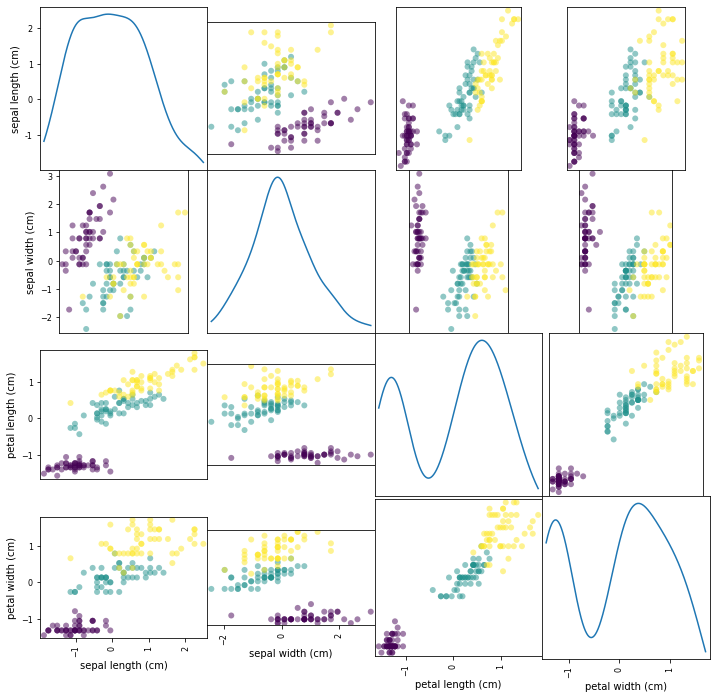

In [0]:
x2 = sklearn.preprocessing.scale(x)
df2 = pd.DataFrame(x2, columns=data.feature_names)
axss = pd.plotting.scatter_matrix(df2, c=y, figsize=(12, 12), marker='o',
                                  diagonal='kde')
for i in range(len(axss)):
  for j in range(len(axss[i])):
    if i != j:
      axss[i,j].set_aspect('equal')

## Agregando ruido y outliers

Ahora agregaremos ruido para ver como cambian los datos

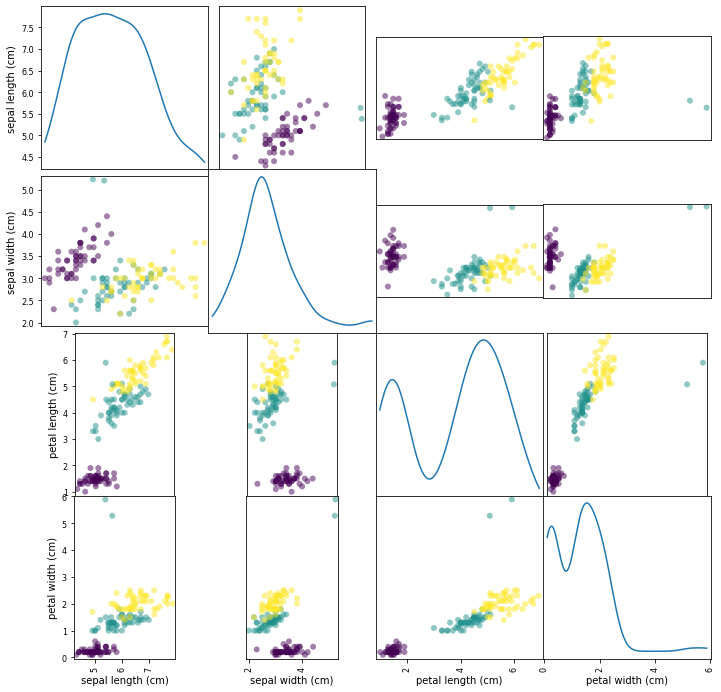

In [0]:
x3 = np.concatenate((x, np.random.rand(2, 4) + 5))
y3 = np.concatenate((y, np.ones((2,))))
import sklearn.utils
sklearn.utils.shuffle(x3, y3)
df3 = pd.DataFrame(x3, columns=data.feature_names)
axss = pd.plotting.scatter_matrix(df3, c=y3, figsize=(12, 12), marker='o',
                                  diagonal='kde')

for i in range(len(axss)):
  for j in range(len(axss[i])):
    if i != j:
      axss[i,j].set_aspect('equal')

# Ejercicios adicionales

A continuación se presentarán varios ejercicios

## Ejercicio 1

En la última parte se agregaron outliers a nuestro conjunto de datos. Analiza el comportamiento de `x3` y elimina estos puntos para purificar nuestros datos. No te olvides de modificar `y3` también!

HINT: Piensa en los rangos en los que se encuentran los outliers. Plottea tu nuevo conjunto de datos para verificar las modificaciones.

In [0]:
# Tu codigo va aqui

## Ejercicio 2

Aplica otras técnicas de preprocesado y plottea los nuevos resultados.

In [0]:
# Tu codigo va aqui

## Ejercicio 3

Hay dos clases que se enciman mucho en nuestro conjunto de datos. Transformalo y quita una de estas dos para llevar el problema a clasificación binaria. Plottea los resultados.

In [0]:
# Tu codigo va aquio